# Week06a

### 가우시안 모델 구축

In [13]:
import tensorflow as tf

class Model:
    def __init__(self) -> None:
        self.mu = tf.Variable(1.0, dtype=tf.float32)
        self.sig = tf.Variable(1.0, dtype=tf.float32)

    def __call__(self, x) -> tf:
        x_c = tf.cast(x, tf.float32)
        return tf.exp(-tf.pow(x_c-self.mu, 2.0) / (2*tf.pow(self.sig, 2)))

### 선형 회귀를 이용한 분류

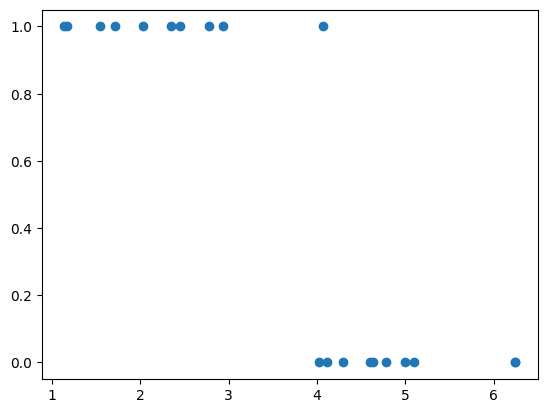

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x_label0 = np.random.normal(5, 1, 10)#평균 5, 표준편차 1, 데이터수 10
x_label1 = np.random.normal(2, 1, 10)#평균 2, 표준편차 1, 데이터수 10
x_train = np.append(x_label0, x_label1)
y_train = [0.] * len(x_label0) + [1.] * len(x_label1)
plt.scatter(x_train, y_train)

### 2D로지스틱 회기 데이터셋

Text(0.5, 1.0, 'Original dataset')

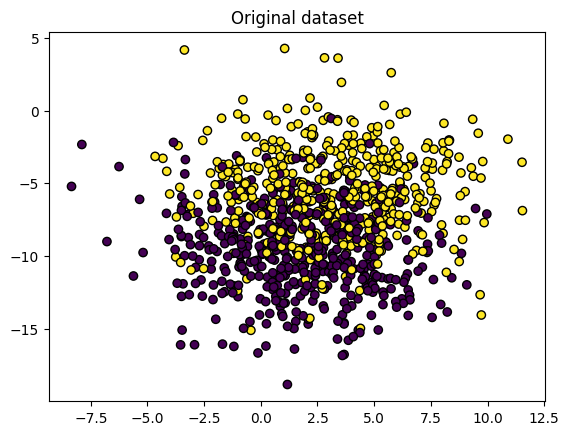

In [15]:
from sklearn.datasets import make_blobs

x_train, y_train = make_blobs(n_samples=1000, centers=2, n_features=2,cluster_std=3.0)
plt.scatter(x_train[:, 0], x_train[:, 1],c=y_train, edgecolors='k', marker='o')
plt.title('Original dataset')

### 2D로지스틱 회기 모델

Epoch 1/50
125/125 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.8810
Epoch 2/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.9530
Epoch 3/50
125/125 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9590
Epoch 4/50
125/125 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.9600
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9600
Epoch 6/50
125/125 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9610
Epoch 7/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9610
Epoch 8/50
125/125 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9620
Epoch 9/50
125/125 [==============================] - 0s 1ms/step - loss: 0.0984 - accuracy: 0.9630
Epoch 10/50
125/125 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.9630

'\ny_predictions = model.predict(x_train)\ny_pred = (y_predictions > 0.5).astype(int).flatten()\ncm = confusion_matrix(y_train, y_pred)\nplt.figure(figsize=(10, 7))\nsns.heatmap(cm, annot=True, fmt="d", cmap="Blues")\nplt.xlabel(\'Predicted labels\')\nplt.ylabel(\'True labels\')\nplt.title(\'Confusion Matrix\')\n# 성능지수 계산\naccuracy = accuracy_score(y_train, y_pred)\nprecision = precision_score(y_train, y_pred)\nrecall = recall_score(y_train, y_pred)\nf1 = f1_score(y_train, y_pred)\n'

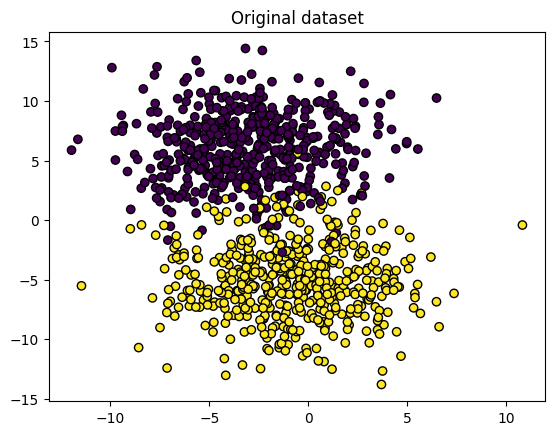

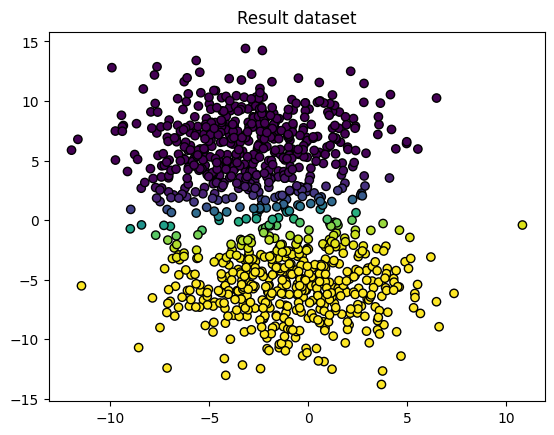

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.datasets import make_blobs

x_train, y_train = make_blobs(n_samples=1000, centers=2, n_features=2,cluster_std=3.0)
plt.scatter(x_train[:, 0], x_train[:, 1],c=y_train, edgecolors='k', marker='o')
plt.title('Original dataset')

learning_rate=0.01
learning_epochs=50
batch_size = 8
model = models.Sequential([
      layers.Input(shape=(2,)),
      layers.Dense(1, activation='sigmoid')
])
optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
x_train = tf.convert_to_tensor(x_train,dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train,dtype=tf.float32)
history = model.fit(x_train, y_train, epochs=learning_epochs, batch_size=batch_size)

y_pred = model.predict(x_train)
plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_pred, cmap='viridis', edgecolors='k', marker='o')
plt.title('Result dataset')
accuracy_history = history.history['accuracy']
# 정확도 평균 계산
average_accuracy = np.mean(accuracy_history)
print(f"Training Accuracy 평균: {average_accuracy:.2f}")

'''
y_predictions = model.predict(x_train)
y_pred = (y_predictions > 0.5).astype(int).flatten()
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
# 성능지수 계산
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
'''
